# Eq. di Schrodinger in una dimensione

Considerare l'equazione

$$ \frac{d^2 \psi}{dx^2} = \frac {2m}{\hbar ^2}[V(x)-E]\psi (x) $$

con il potenziale

$$ V(x) = 
    \begin{cases}
        0,& \text{se }  -L/2 < x < L/2\\
        \infty,              & \text{altrimenti}
    \end{cases} $$

Scegliendo le unità di misura della lunghezza $ l_0 = L/2 $ e dell’energia $ e_0 = \frac{ 2 \hbar ^2}{mL^2}$, ed esprimendo $ x $ ed $ E $ in tali unità di misura, il fattore $ \frac {2m}{\hbar ^2} $ e la semilarghezza $ L/2 $ possono essere posti uguale a uno. Ponendo $ y_1(x) = ψ(x) $, $ y_2(x) = \frac{dψ(x)}{dx} $, l’eq diventa per $ −1 < x < 1 $

$$ \frac{dy_1}{dx} = y_2(x) $$

$$ \frac{dy_2}{dx} = -Ey_1(x) $$

con le condizioni al contorno $ y_1(−1) = y_1(1) = 0 $.
Porre $ y_1(−1) = 0 $, $ y_2(−1) = 1 $, e risolvere con il metodo Runge-Kutta le equazioni. Gli autovalori dell’energia $ E $ sono i valori di $ E $ tali che $ y_1(1) = 0 $.
Fare un grafico del valore di $ y_1(1) $ in funzione di $ E $. Verificare che gli zeri della funzione (gli autovalori dell’energia) hanno approssimativamente i valori calcolabili analiticamente, ovvero in unità di $ \frac{ 2 \hbar ^2}{mL^2} $

$$ E = \frac{\pi ^2 n^2}{4}, \; \; \; |; n \in \mathbb{N} $$

dove $ n $ dispari (pari) corrisponde a una soluzione pari (dispari).
N.B: Le soluzioni pari hanno $ y_2(0) = 0 $, quelle dispari $ y_1(0) = 0 $. Sfruttando questa circostanza è possibile risolvere le equazioni solo nell’intervallo $ −1 < x < 0 $, e identificando gli autovalori pari (dispari) dalle condizioni $ y_2(0) = 0 $, $y_1(0) = 0 $.



[0.0, 0.012598899727651602, 0.0203955989104756, 0.033390097549620634, 0.061582395643270615, 0.12497249318777648, 0.24356039020443632, 0.43734608668053454, 0.7463295825709508, 1.190510877902625]


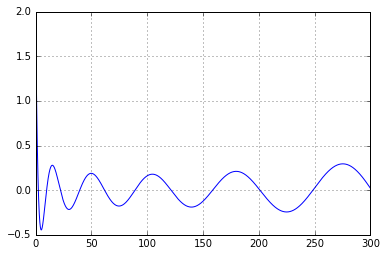

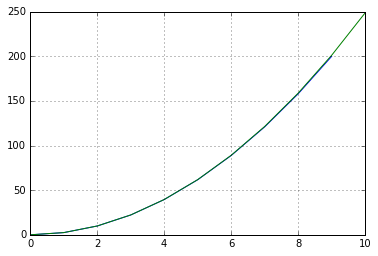

In [30]:
%matplotlib inline    
                                                          #Comando magico, permette di stampare i risultati nel notebook
import matplotlib.pyplot as mpl
import math                                               #Importa le librerie necessarie
import numpy

E_n_vero = []                                             #Calcola i valori ottenuti analiticamente

for n in range(10):
    
    E_n_vero.append((math.pi * math.pi * n * n)/4)


E_n = [0]                                                #Definisce liste e variabili indispensabili!

E = [0]
dE = 0.01

yE= [0]


for j in range(1, 30000):                                #Il ciclo interno risolve l'equazione, quello esterno fa si che
    
    h = 0.01                                             #Venga risolta per pi valori di E
    x = [-1]
        
    y1 = [0]
    y2 = [1]

    
    for i in range(1, 201):
        
        
        k1y1 = y2[i-1]                                    #Se non lo fai al quarto ordine non sei nessuno!
        k1y2 = -E[j-1]*y1[i-1]

        k2y1 = y2[i-1]+h*0.5*k1y2
        k2y2 = -E[j-1]*y1[i-1]-h*0.5*k1y1

        k3y1 = y2[i-1]+h*0.5*k2y2
        k3y2 = -E[j-1]*y1[i-1]-h*0.5*k2y1

        k4y1 = y2[i-1]+h*0.5*k3y2
        k4y2 = -E[j-1]*y1[i-1]-h*0.5*k3y1

        y1.append(y1[i-1]+h/6*(k1y1+2*k2y1+2*k3y1+k4y1))
        y2.append(y2[i-1]+h/6*(k1y2+2*k2y2+2*k3y2+k4y2))
    
        x.append(x[i-1] + h)
        
                    
    yE.append(y1[200])                                    #Conserva i valori della soluzione in x=1

    E.append(E[j-1] + dE)
        

    if ((yE[j-1] > 0 and yE[j] < 0) or (yE[j-1] < 0 and yE[j] > 0)) :
            
        E_n.append(E[j-1] + dE)                          #Se la funzione cambia segno, è un autovalore!
                                                         #Lo zero è nelle definizioni delle liste!
                                                         #Si potrebbe migliorare la stima di E_n, ma tanto è solo
                                                         #una verifica approssimativa!!           
            
            
if (len(E_n) <= len(E_n_vero)):                          #Trova il vettore più corto...
    
    minimo = len(E_n)
    
else:
    
    minimo = len(E_n_vero)
    

R = []    
    
for k in range(minimo):                                  #Trova le differenze
    
    R.append(E_n[k] - E_n_vero[k])


print(R)

mpl.figure()
mpl.plot(E, yE)
mpl.grid()

mpl.figure()        
mpl.plot(E_n_vero)
mpl.plot(E_n)
mpl.grid()

mpl.show()